# Employee Attrition Analysis


In [472]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform
from sklearn.metrics import f1_score

import statsmodels.api as sm

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import RandomizedSearchCV

In [390]:
data = pd.read_excel(r"C:\Users\user\Documents\Study\Analytics Competition_2023\Employee Attrition Dataset.xlsx")


In [391]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [392]:
data.shape

(1470, 35)

In [393]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [394]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [395]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [396]:
columns_to_convert = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                      'PerformanceRating', 'RelationshipSatisfaction', 
                      'JobSatisfaction']

# Convert the specified columns to object type
data[columns_to_convert] = data[columns_to_convert].astype('object')


# Verify the data type has been changed
print(data.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Pre- Processing

In [397]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [398]:
data = data.drop(['DailyRate','EmployeeNumber', 'MonthlyRate', 'HourlyRate', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, errors='ignore')

In [399]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [400]:
data.shape

(1470, 28)

# Checking for Normal Distribution

Text(0, 0.5, 'Frequency')

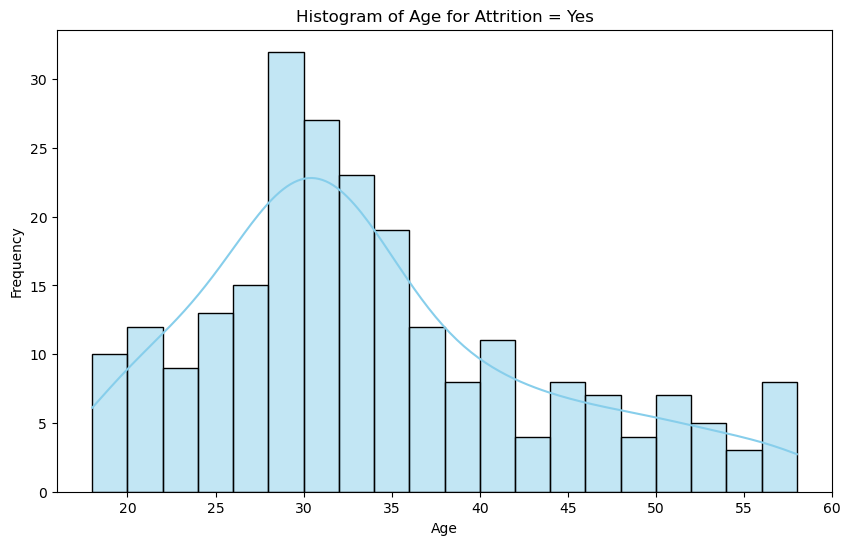

In [401]:
# Filter data for Attrition == 'Yes'
attrition_yes = data[data['Attrition'] == 'Yes']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(attrition_yes['Age'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of Age for Attrition = Yes')
plt.xlabel('Age')
plt.ylabel('Frequency')



# Analytics

# Heatmap

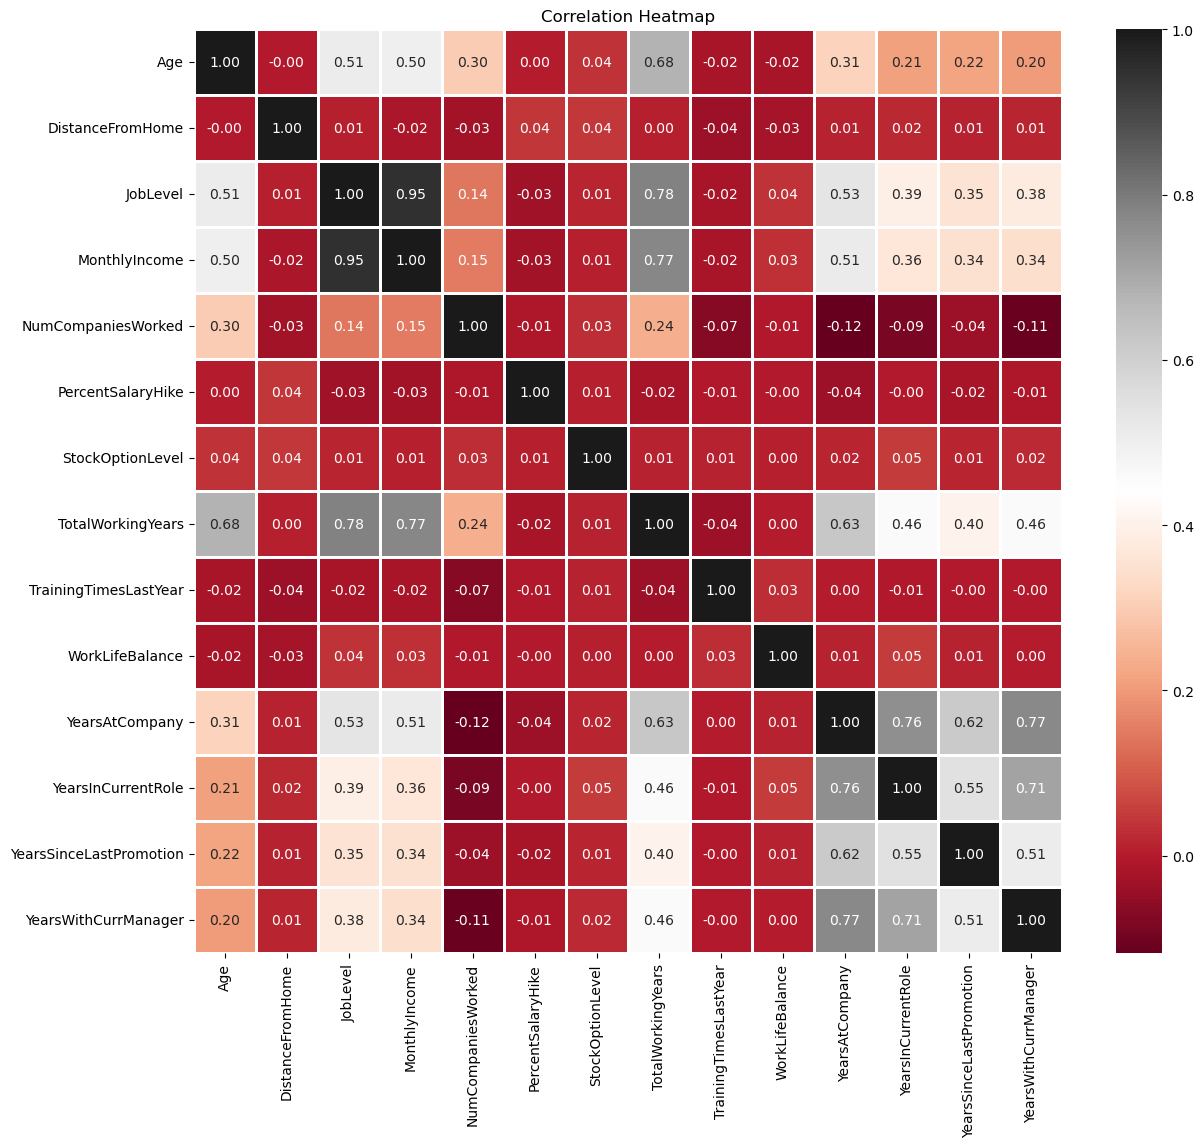

In [402]:

numerical_columns = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                      'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                      'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                      'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdGy', fmt=".2f", linewidths=1.0)

plt.title('Correlation Heatmap')
plt.show()


# Observations:
# Total Working Year , Monthly Income, Job Level / Age
# Total Working Year, Years at Company, Monthly Income / Job level
# Years at Company, Total Working Years / Monthly Income
# Performance Rating / Percent Salary Hike
# Years at Company  / Total Working Years
# Years with Current manager, Years since last promotion, Years in current role,  / Years at Company
# Years with Current manager, years since last promotion,   / Years in current role

# Encoding

In [403]:
#Attrition mapping
data['Attrition'] = label_encoder.fit_transform(data['Attrition']) # (0=no, 1=yes)

 



In [404]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [407]:
unique_business_travel = data['BusinessTravel'].unique()

# Display the unique values
print("unique_business_travel:")
for business_travel in unique_business_travel:
    print(business_travel)

unique_business_travel:
Travel_Rarely
Travel_Frequently
Non-Travel


In [408]:
# Mapping 'BusinessTravel' column
business_travel_mapping = {'Non-Travel': 1, 'Travel_Frequently': 0, 'Travel_Rarely': 0}  

data['BusinessTravel'] = data['BusinessTravel'].map(business_travel_mapping)


In [409]:
data.head(25)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,0,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,0,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
5,32,0,0,Research & Development,2,2,Life Sciences,4,Male,3,...,3,3,0,8,2,2,7,7,3,6
6,59,0,0,Research & Development,3,3,Medical,3,Female,4,...,4,1,3,12,3,2,1,0,0,0
7,30,0,0,Research & Development,24,1,Life Sciences,4,Male,3,...,4,2,1,1,2,3,1,0,0,0
8,38,0,0,Research & Development,23,3,Life Sciences,4,Male,2,...,4,2,0,10,2,3,9,7,1,8
9,36,0,0,Research & Development,27,3,Medical,3,Male,3,...,3,2,2,17,3,2,7,7,7,7


In [410]:
# Department_1 corresponds to "Human Resources", Department_2 corresponds to "Research & Development". and Department_3 
#corresponds to "Sales"

# Create dummy variables for 'Department'
department_dummies = pd.get_dummies(data['Department'])

# Rename the dummy variables based on departments
department_dummies.rename(columns={
    'Human Resources': 'Department_1',
    'Research & Development': 'Department_2',
    'Sales': 'Department_3'
}, inplace=True)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, department_dummies], axis=1)

# Drop the original 'Department' column
data.drop(columns=['Department'], inplace=True)



In [411]:
data.head(25)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_1,Department_2,Department_3
0,41,1,0,1,2,Life Sciences,2,Female,3,2,...,8,0,1,6,4,0,5,0,0,1
1,49,0,0,8,1,Life Sciences,3,Male,2,2,...,10,3,3,10,7,1,7,0,1,0
2,37,1,0,2,2,Other,4,Male,2,1,...,7,3,3,0,0,0,0,0,1,0
3,33,0,0,3,4,Life Sciences,4,Female,3,1,...,8,3,3,8,7,3,0,0,1,0
4,27,0,0,2,1,Medical,1,Male,3,1,...,6,3,3,2,2,2,2,0,1,0
5,32,0,0,2,2,Life Sciences,4,Male,3,1,...,8,2,2,7,7,3,6,0,1,0
6,59,0,0,3,3,Medical,3,Female,4,1,...,12,3,2,1,0,0,0,0,1,0
7,30,0,0,24,1,Life Sciences,4,Male,3,1,...,1,2,3,1,0,0,0,0,1,0
8,38,0,0,23,3,Life Sciences,4,Male,2,3,...,10,2,3,9,7,1,8,0,1,0
9,36,0,0,27,3,Medical,3,Male,3,2,...,17,3,2,7,7,7,7,0,1,0


In [412]:
# Mapping 'Education' column
Education_mapping = {'1': 1, '2': 1, '3': 1, '4': 0, '5': 0}  

data['Education'] = data['Education'].astype(str).map(Education_mapping)


In [413]:
data.head(25)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_1,Department_2,Department_3
0,41,1,0,1,1,Life Sciences,2,Female,3,2,...,8,0,1,6,4,0,5,0,0,1
1,49,0,0,8,1,Life Sciences,3,Male,2,2,...,10,3,3,10,7,1,7,0,1,0
2,37,1,0,2,1,Other,4,Male,2,1,...,7,3,3,0,0,0,0,0,1,0
3,33,0,0,3,0,Life Sciences,4,Female,3,1,...,8,3,3,8,7,3,0,0,1,0
4,27,0,0,2,1,Medical,1,Male,3,1,...,6,3,3,2,2,2,2,0,1,0
5,32,0,0,2,1,Life Sciences,4,Male,3,1,...,8,2,2,7,7,3,6,0,1,0
6,59,0,0,3,1,Medical,3,Female,4,1,...,12,3,2,1,0,0,0,0,1,0
7,30,0,0,24,1,Life Sciences,4,Male,3,1,...,1,2,3,1,0,0,0,0,1,0
8,38,0,0,23,1,Life Sciences,4,Male,2,3,...,10,2,3,9,7,1,8,0,1,0
9,36,0,0,27,1,Medical,3,Male,3,2,...,17,3,2,7,7,7,7,0,1,0


In [414]:
unique_education_field = data['EducationField'].unique()

# Display the unique values
print("unique_education_field:")
for education_field in unique_education_field:
    print(education_field)

unique_education_field:
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


In [415]:
# Create dummy variables for 'EducationField'
EducationField_dummies = pd.get_dummies(data['EducationField'])

# Rename the dummy variables based on departments
EducationField_dummies.rename(columns={
    'Life Sciences': 'Education_Field_1',
    'Medical': 'Education_Field_2',
    'Marketing': 'Education_Field_3',
    'Technical Degree': 'Education_Field_4',
    'Human Resources': 'Education_Field_5',
    'Other': 'Education_Field_6'
}, inplace=True)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, EducationField_dummies], axis=1)

# Drop the original 'Department' column
data.drop(columns=['EducationField'], inplace=True)

In [416]:
data.head(25)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,2,Female,3,2,Sales Executive,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,3,Male,2,2,Research Scientist,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,4,Male,2,1,Laboratory Technician,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,4,Female,3,1,Research Scientist,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,Male,3,1,Laboratory Technician,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,4,Male,3,1,Laboratory Technician,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,3,Female,4,1,Laboratory Technician,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,4,Male,3,1,Laboratory Technician,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,4,Male,2,3,Manufacturing Director,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,3,Male,3,2,Healthcare Representative,...,7,0,1,0,0,0,0,1,0,0


In [417]:
# Mapping 'Gender' column
gender_mapping = {'Female': 0, 'Male': 1}

data['Gender'] = data['Gender'].map(gender_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,2,0,3,2,Sales Executive,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,3,1,2,2,Research Scientist,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,4,1,2,1,Laboratory Technician,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,4,0,3,1,Research Scientist,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,3,1,Laboratory Technician,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,4,1,3,1,Laboratory Technician,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,3,0,4,1,Laboratory Technician,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,4,1,3,1,Laboratory Technician,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,4,1,2,3,Manufacturing Director,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,3,1,3,2,Healthcare Representative,...,7,0,1,0,0,0,0,1,0,0


In [418]:
unique_job_roles = data['JobRole'].unique()

# Display the unique values
print("Unique Job Roles:")
for job_role in unique_job_roles:
    print(job_role)


Unique Job Roles:
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources


In [419]:
# Encode specified categories in the 'JobRole' column as "0" and "1"
data['JobRole'] = data['JobRole'].replace({'Sales Representative': 0,
                                           'Manager': 0,
                                           'Human Resources': 0,
                                           'Sales Executive': 0,
                                           'Research Director': 1,
                                           'Laboratory Technician': 1,
                                           'Research Scientist': 1,
                                           'Healthcare Representative': 1,
                                           'Manufacturing Director': 1})


In [420]:
data.head(25)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,2,0,3,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,3,1,2,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,4,1,2,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,4,0,3,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,3,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,4,1,3,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,3,0,4,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,4,1,3,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,4,1,2,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,3,1,3,2,1,...,7,0,1,0,0,0,0,1,0,0


In [421]:
unique_marital_status = data['MaritalStatus'].unique()

# Display the unique values
print("Unique Marital Status:")
for marital_status in unique_marital_status:
    print(marital_status)


Unique Marital Status:
Single
Married
Divorced


In [422]:
# Mapping 'Marital Status' column
marital_status_mapping = {'Single':1, 'Married': 0, 'Divorced': 1}

data['MaritalStatus'] = data['MaritalStatus'].map(marital_status_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,2,0,3,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,3,1,2,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,4,1,2,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,4,0,3,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,3,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,4,1,3,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,3,0,4,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,4,1,3,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,4,1,2,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,3,1,3,2,1,...,7,0,1,0,0,0,0,1,0,0


In [423]:
# Mapping 'EnvironmentSatisfaction' column
EnvironmentSatisfaction_mapping = {'1':1, '2': 1, '3': 0, '4':0}

data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].astype(str).map(EnvironmentSatisfaction_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,3,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,2,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,2,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,3,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,3,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,3,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,4,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,3,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,2,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,3,2,1,...,7,0,1,0,0,0,0,1,0,0


In [424]:
# Mapping 'JobInvolvement' column
JobInvolvement_mapping = {'1':1, '2': 1, '3': 0, '4':0}

data['JobInvolvement'] = data['JobInvolvement'].astype(str).map(JobInvolvement_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,0,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,1,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,0,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,0,2,1,...,7,0,1,0,0,0,0,1,0,0


In [425]:
# Mapping 'RelationshipSatisfaction' column
RelationshipSatisfaction_mapping = {'1':1, '2': 1, '3': 0, '4':0}

data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].astype(str).map(RelationshipSatisfaction_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,0,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,1,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,0,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,0,2,1,...,7,0,1,0,0,0,0,1,0,0


In [426]:
# Mapping 'JobSatisfaction' column
JobSatisfaction_mapping = {'1':1, '2': 1, '3': 0, '4':0}

data['JobSatisfaction'] = data['JobSatisfaction'].astype(str).map(JobSatisfaction_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,0,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,1,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,0,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,0,2,1,...,7,0,1,0,0,0,0,1,0,0


In [427]:
# Mapping 'PerformanceRating' column
PerformanceRating_mapping = {'3': 1, '4':0}

data['PerformanceRating'] = data['PerformanceRating'].astype(str).map(PerformanceRating_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,0,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,1,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,0,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,0,2,1,...,7,0,1,0,0,0,0,1,0,0


In [428]:
# Mapping 'OverTime' column
OverTime_mapping = {'Yes': 1, 'No':0}

data['OverTime'] = data['OverTime'].map(OverTime_mapping)

data.head(10)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,YearsWithCurrManager,Department_1,Department_2,Department_3,Education_Field_5,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4
0,41,1,0,1,1,1,0,0,2,0,...,5,0,0,1,0,1,0,0,0,0
1,49,0,0,8,1,0,1,1,2,1,...,7,0,1,0,0,1,0,0,0,0
2,37,1,0,2,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,1,0
3,33,0,0,3,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,2,0,1,0,0,0,0,1,0,0
5,32,0,0,2,1,0,1,0,1,1,...,6,0,1,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
7,30,0,0,24,1,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,3,1,...,8,0,1,0,0,1,0,0,0,0
9,36,0,0,27,1,0,1,0,2,1,...,7,0,1,0,0,0,0,1,0,0


In [429]:


# Create dummy variables for 'JobLevel' with specified column names
JobLevel_dummies = pd.get_dummies(data['JobLevel'], prefix='JobLevel')

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, JobLevel_dummies], axis=1)

# Drop the original 'JobLevel' column
data.drop(columns=['JobLevel'], inplace=True)


In [430]:
data.head(15)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
0,41,1,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,49,0,0,8,1,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,2,1,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,33,0,0,3,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
5,32,0,0,2,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
7,30,0,0,24,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
9,36,0,0,27,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [431]:

# Encode specified categories in the 'WorkLifeBalance' column as "0" and "1"
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace({'1': 0,
                                           '2': 1,
                                           '3': 1,
                                           '4': 1})



In [432]:
data.head(15)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
0,41,1,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,49,0,0,8,1,0,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,2,1,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3,33,0,0,3,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,27,0,0,2,1,1,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
5,32,0,0,2,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6,59,0,0,3,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
7,30,0,0,24,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
8,38,0,0,23,1,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
9,36,0,0,27,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [433]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Department_1                0
Department_2                0
Department_3                0
Education_Field_5           0
Education_Field_1           0
Education_Field_3           0
Education_Field_2           0
Education_Field_6           0
Education_

In [434]:
data.shape

(1470, 39)

In [435]:
data.describe()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,Education_Field_1,Education_Field_3,Education_Field_2,Education_Field_6,Education_Field_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.102041,9.192517,0.696599,0.388435,0.600000,0.311565,0.617007,0.387075,...,0.412245,0.108163,0.315646,0.055782,0.089796,0.369388,0.363265,0.148299,0.072109,0.046939
std,9.135373,0.367863,0.302805,8.106864,0.459884,0.487560,0.490065,0.463291,0.486282,0.487247,...,0.492406,0.310692,0.464931,0.229579,0.285986,0.482803,0.481104,0.355517,0.258756,0.211580
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,0.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,60.000000,1.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [436]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Department_1', 'Department_2', 'Department_3',
       'Education_Field_5', 'Education_Field_1', 'Education_Field_3',
       'Education_Field_2', 'Education_Field_6', 'Education_Field_4',
       'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5'],
      dtype='object')

# Logistic Regression

In [441]:
# Define the parameter distribution
param_dist = {
    'C': uniform(loc=0.001, scale=100),  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term ('l1': Lasso, 'l2': Ridge)
}

# Initialize logistic regression model
logreg_model = LogisticRegression(random_state=42, solver='liblinear')  # 'liblinear' solver is suitable for small datasets

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV on the scaled training data
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best logistic regression model
best_logreg_model = random_search.best_estimator_

Best Parameters: {'C': 0.07887658410143283, 'penalty': 'l2'}
Best Score: 0.8707428777497295


In [442]:
selected_attributes = ['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_1', 'Department_2', 'Department_3', 'Education_Field_5',
       'Education_Field_1', 'Education_Field_3', 'Education_Field_2',
       'Education_Field_6', 'Education_Field_4', 'JobRole', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3',
       'JobLevel_4', 'JobLevel_5', 'WorkLifeBalance']

In [443]:
# Define the best parameters obtained from hyperparameter tuning
best_params = {
    'C': 0.07887658410143283,
    'penalty': 'l2'
}

# Selecting features and target variable
X = data[selected_attributes]
y = data['Attrition']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with best parameters
logreg_model = LogisticRegression(solver='liblinear', **best_params, random_state=42)

# Fitting the model on the training data
logreg_model.fit(X_train_scaled, y_train)

# Use statsmodels to add intercept to X_train_scaled
X_train_scaled_with_intercept = sm.add_constant(X_train_scaled)

# Fit the logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_with_intercept)
logit_result = logit_model.fit()

# Displaying the regression coefficients and p-values
print("Regression Coefficients and p-values:")
for i, (feature, coef) in enumerate(zip(['intercept'] + selected_attributes, logit_result.params)):
    p_value = logit_result.pvalues[i]
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f"{feature}: Coefficient = {coef:.4f}, p-value = {p_value:.4f} ({significance})")

Optimization terminated successfully.
         Current function value: 0.303981
         Iterations 9
Regression Coefficients and p-values:
intercept: Coefficient = -2.6369, p-value = 0.0000 (Significant)
Age: Coefficient = -0.2795, p-value = 0.0414 (Significant)
BusinessTravel: Coefficient = -0.4868, p-value = 0.0005 (Significant)
DistanceFromHome: Coefficient = 0.4397, p-value = 0.0000 (Significant)
Education: Coefficient = -0.0070, p-value = 0.9452 (Not Significant)
EnvironmentSatisfaction: Coefficient = 0.4627, p-value = 0.0000 (Significant)
Gender: Coefficient = 0.1154, p-value = 0.2368 (Not Significant)
JobInvolvement: Coefficient = 0.2967, p-value = 0.0015 (Significant)
JobSatisfaction: Coefficient = 0.2391, p-value = 0.0133 (Significant)
MaritalStatus: Coefficient = 0.1449, p-value = 0.1621 (Not Significant)
MonthlyIncome: Coefficient = -0.8697, p-value = 0.0361 (Significant)
NumCompaniesWorked: Coefficient = 0.5278, p-value = 0.0000 (Significant)
OverTime: Coefficient = 0.7292

In [444]:
# Define the significance level
significance_level = 0.05

# List to store significant and insignificant variables
significant_variables = []
insignificant_variables = []

# Displaying the regression coefficients and p-values
print("Regression Coefficients and p-values:")
for i, (feature, coef) in enumerate(zip(['intercept'] + selected_attributes, logit_result.params)):
    p_value = logit_result.pvalues[i]
    significance = 'Significant' if p_value < significance_level else 'Not Significant'
    print(f"{feature}: Coefficient = {coef:.4f}, p-value = {p_value:.4f} ({significance})")
    
    # Segregate significant and insignificant variables
    if p_value < significance_level:
        significant_variables.append(feature)
    else:
        insignificant_variables.append(feature)

print("\nSignificant Variables:")
print(significant_variables)

print("\nInsignificant Variables:")
print(insignificant_variables)


Regression Coefficients and p-values:
intercept: Coefficient = -2.6369, p-value = 0.0000 (Significant)
Age: Coefficient = -0.2795, p-value = 0.0414 (Significant)
BusinessTravel: Coefficient = -0.4868, p-value = 0.0005 (Significant)
DistanceFromHome: Coefficient = 0.4397, p-value = 0.0000 (Significant)
Education: Coefficient = -0.0070, p-value = 0.9452 (Not Significant)
EnvironmentSatisfaction: Coefficient = 0.4627, p-value = 0.0000 (Significant)
Gender: Coefficient = 0.1154, p-value = 0.2368 (Not Significant)
JobInvolvement: Coefficient = 0.2967, p-value = 0.0015 (Significant)
JobSatisfaction: Coefficient = 0.2391, p-value = 0.0133 (Significant)
MaritalStatus: Coefficient = 0.1449, p-value = 0.1621 (Not Significant)
MonthlyIncome: Coefficient = -0.8697, p-value = 0.0361 (Significant)
NumCompaniesWorked: Coefficient = 0.5278, p-value = 0.0000 (Significant)
OverTime: Coefficient = 0.7292, p-value = 0.0000 (Significant)
PercentSalaryHike: Coefficient = 0.0041, p-value = 0.9784 (Not Signif

In [473]:
# Making predictions on the testing data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.86
Confusion Matrix:
[[235   5]
 [ 35  19]]
Sensitivity (Recall): 0.35
Specificity: 0.98
F1 Score: 0.49


# XGBoost

In [446]:

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create the XGBRegressor
xgb_model = xgb.XGBRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# Get the best model
best_xgb_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.10699918991668815


In [475]:

# Define the best parameters obtained from hyperparameter tuning
best_params = {
    'subsample': 0.7,
    'reg_lambda': 0.5,
    'reg_alpha': 1,
    'n_estimators': 500,
    'min_child_weight': 5,
    'max_depth': 9,
    'learning_rate': 0.01,
    'gamma': 0.2,
    'colsample_bytree': 0.6
}

# Create the XGBRegressor with the best parameters
tuned_xgb_model = xgb.XGBRegressor(**best_params)

# Train the tuned XGBoost model on the training data
tuned_xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = tuned_xgb_model.predict(X_test)

# Evaluate the model (e.g., using metrics like mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Define the threshold for classification
threshold = 0.5

# Convert the continuous predictions to binary format based on the threshold
y_pred_binary = (y_pred > threshold).astype(int)


# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")




Mean Squared Error: 0.10256682703469383
Accuracy: 0.85
Confusion Matrix:
[[237   3]
 [ 40  14]]
Sensitivity (Recall): 0.26
Specificity: 0.99
F1 Score: 0.39


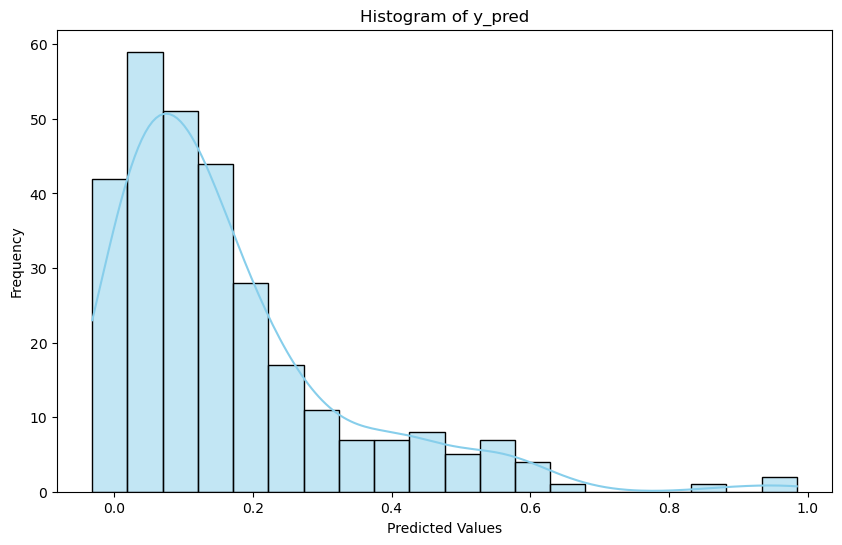

In [466]:
import seaborn as sns

# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, color='skyblue', bins=20)
plt.title('Histogram of y_pred')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x800 with 0 Axes>

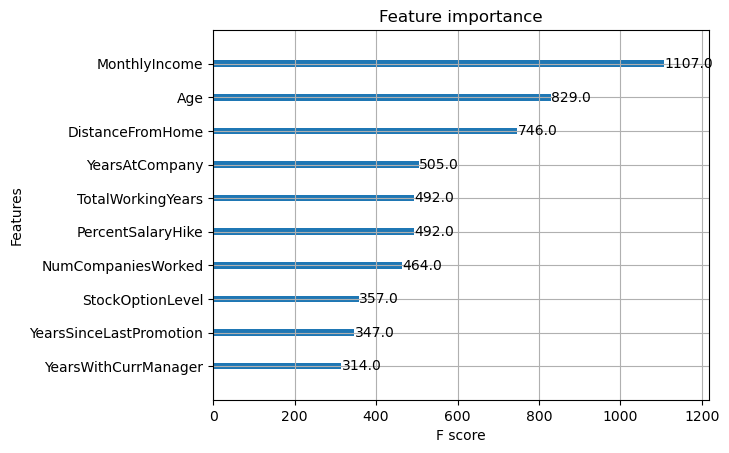

In [448]:
# Create the XGBRegressor with the best parameters
xgb_model = xgb.XGBRegressor(**best_params)

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Visualizing feature importance
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

# KNN

In [476]:


# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 21),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Create the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn_model, param_distributions=param_grid, n_iter=100, 
                                   scoring='accuracy', cv=5, verbose=2, random_state=42)

# Perform hyperparameter tuning
random_search.fit(X_train_scaled, y_train)  # Assuming you have X_train_scaled and y_train

# Get the best parameters
best_params = random_search.best_params_

# Use the best parameters to create the KNN model
best_knn_model = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_knn_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

C:\Users\user\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=2, we

# Random Forest

In [477]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, 
                               n_iter=100, scoring='accuracy', cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)

# Perform RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = rf_random.best_params_
best_rf_model = rf_random.best_estimator_

# Use the best model to make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\user\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.83
Confusion Matrix:
[[240   0]
 [ 49   5]]
Sensitivity (Recall): 0.09
Specificity: 1.00
F1 Score: 0.17


# Decision Tree

In [478]:

# Assuming the 'data' and 'selected_attributes' variables are predefined as per your previous setup
X = data[selected_attributes]
y = data['Attrition']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

# Initializing the Decision Tree model with pruning
# Setting max_depth to limit the growth of the tree
# Setting min_samples_split to specify the minimum number of samples required to split an internal node
# Setting min_samples_leaf to specify the minimum number of samples required to be at a leaf node
dt_model = DecisionTreeClassifier(
    max_depth=5,            # Maximum depth of the tree to prevent overfitting
    min_samples_split=20,   # Minimum number of samples required to split an internal node
    min_samples_leaf=10,    # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Fitting the model on the training data
dt_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positives, False Positives, True Negatives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity (recall)
sensitivity = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.85
Confusion Matrix:
[[226  14]
 [ 31  23]]
Sensitivity (Recall): 0.43
Specificity: 0.94
F1 Score: 0.51
